<a href="https://colab.research.google.com/github/Jaironpz/Analyzing-Visualizing-Data-PowerBI/blob/master/Proyecto_Integrador_I_EDA_JairoNi%C3%B1oPerez_JEPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

In [4]:
#importación de ticker JEPI (JPMorgan Equity Premium Income)
import yfinance as yf
fondo = yf.Ticker("JEPI")
datos_fondo = fondo.history(period = "1y")
datos_fondo.to_csv("fondo_historico.csv")

#Exploración Inicial
print(datos_fondo.head())

                                Open       High        Low      Close  \
Date                                                                    
2024-03-08 00:00:00-05:00  53.112027  53.112027  52.935483  53.056274   
2024-03-11 00:00:00-04:00  52.991237  53.074864  52.805404  53.046989   
2024-03-12 00:00:00-04:00  53.093440  53.288567  53.046982  53.232819   
2024-03-13 00:00:00-04:00  53.260697  53.381492  53.204945  53.307156   
2024-03-14 00:00:00-04:00  53.400082  53.400082  53.065576  53.269997   

                            Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                        
2024-03-08 00:00:00-05:00  3487000        0.0           0.0            0.0  
2024-03-11 00:00:00-04:00  3904400        0.0           0.0            0.0  
2024-03-12 00:00:00-04:00  2976400        0.0           0.0            0.0  
2024-03-13 00:00:00-04:00  4887100        0.0           0.0            0.0  
2024-03-14 00:00:00-04:00 

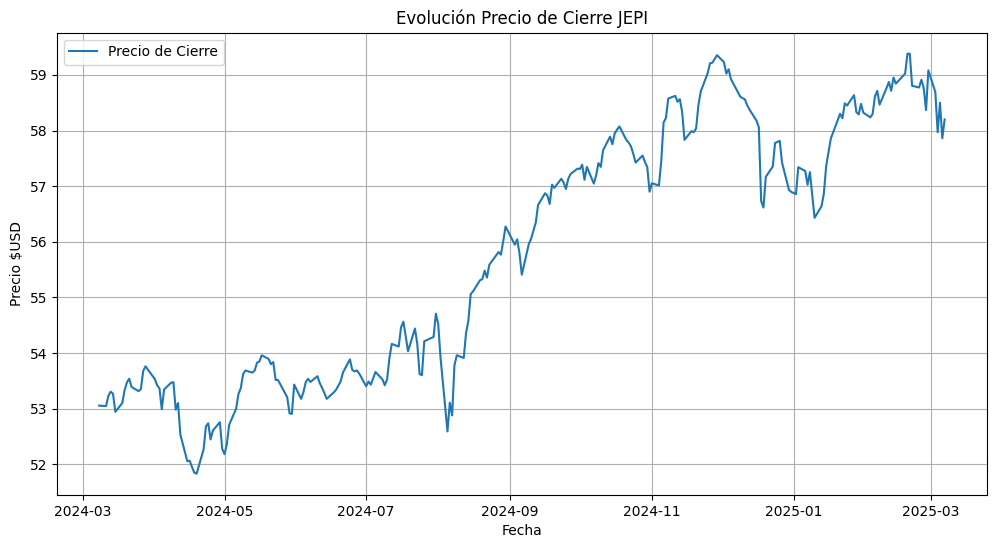

In [5]:
#gráfico

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(datos_fondo.index, datos_fondo["Close"], label="Precio de Cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio $USD")
plt.title("Evolución Precio de Cierre JEPI")
plt.legend()
plt.grid()
plt.show()


In [6]:
#Empezando con FREDAPI
!pip install FREDAPI

In [7]:
from datetime import datetime, timedelta
from fredapi import Fred
import pandas as pd

fred = Fred(api_key="cec90a90b591ed6ae4e85467ffcd306b")

# Toca definir el rango de 12 meses porque por defecto trae todo el histórico
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')

# Esta es mi segunda selección de indicadores, eligiendo publicados con cadencia menor o igual a mensual
indicadores = {
    "CPIAUCSL": "Consumer Price Index (CPI) - Monthly",
    "DFF": "Effective Federal Funds Rate - Daily",
    "UNRATE": "Unemployment Rate - Monthly",
    "GS10": "10-Year Treasury Constant Maturity Rate - Daily"
}

# recolección de datos y dataframe.
df_indicadores = pd.DataFrame()

for clave, nombre in indicadores.items():
    series = fred.get_series(clave)
    df_indicadores[clave] = series

# retirar lo que es mayor a un año.
df_indicadores = df_indicadores[df_indicadores.index >= start_date]

# guardar en CSV
df_indicadores.to_csv("indicadores_economicos.csv")

# chequeo columnas
print(df_indicadores.head())

            CPIAUCSL   DFF  UNRATE  GS10
2024-04-01   313.016  5.33     3.9  4.54
2024-05-01   313.140  5.33     4.0  4.48
2024-06-01   313.131  5.33     4.1  4.31
2024-07-01   313.566  5.33     4.2  4.25
2024-08-01   314.131  5.33     4.2  3.87


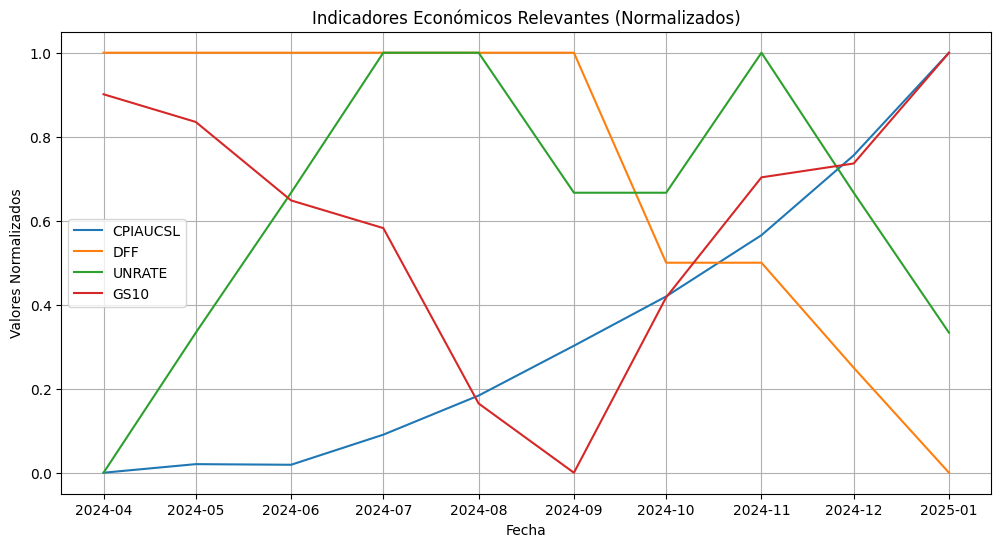

In [8]:
import matplotlib.pyplot as plt

# Normalización de data (Min-Max Scaling)
df_norm = (df_indicadores - df_indicadores.min()) / (df_indicadores.max() - df_indicadores.min())

# gráfico normalizado
plt.figure(figsize=(12,6))
for col in df_norm.columns:
    plt.plot(df_norm.index, df_norm[col], label=col)

plt.xlabel("Fecha")
plt.ylabel("Valores Normalizados")
plt.title("Indicadores Económicos Relevantes (Normalizados)")
plt.legend()
plt.grid()
plt.show()

In [9]:
#Validación estadística
print(df_indicadores.describe())

         CPIAUCSL        DFF     UNRATE       GS10
count   10.000000  10.000000  10.000000  10.000000
mean   315.053700   5.055000   4.090000   4.265000
std      2.097157   0.380971   0.099443   0.291023
min    313.016000   4.330000   3.900000   3.720000
25%    313.246500   4.830000   4.025000   4.137500
50%    314.491000   5.330000   4.100000   4.335000
75%    316.227750   5.330000   4.175000   4.457500
max    319.086000   5.330000   4.200000   4.630000


CPIAUCSL    0
DFF         0
UNRATE      0
GS10        0
dtype: int64


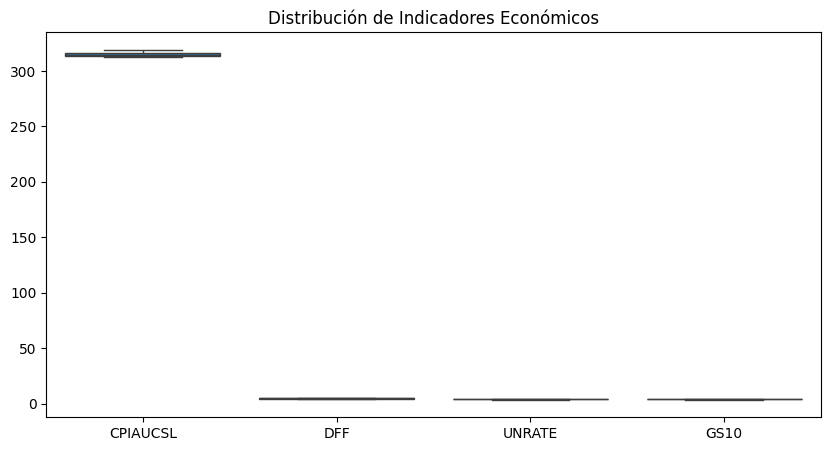

In [10]:
#valores nulos y atípicos

import seaborn as sns
print(df_indicadores.isnull().sum())

#visualización con boxplot

plt.figure(figsize=(10,5))
sns.boxplot(data=df_indicadores)
plt.title("Distribución de Indicadores Económicos")
plt.show()

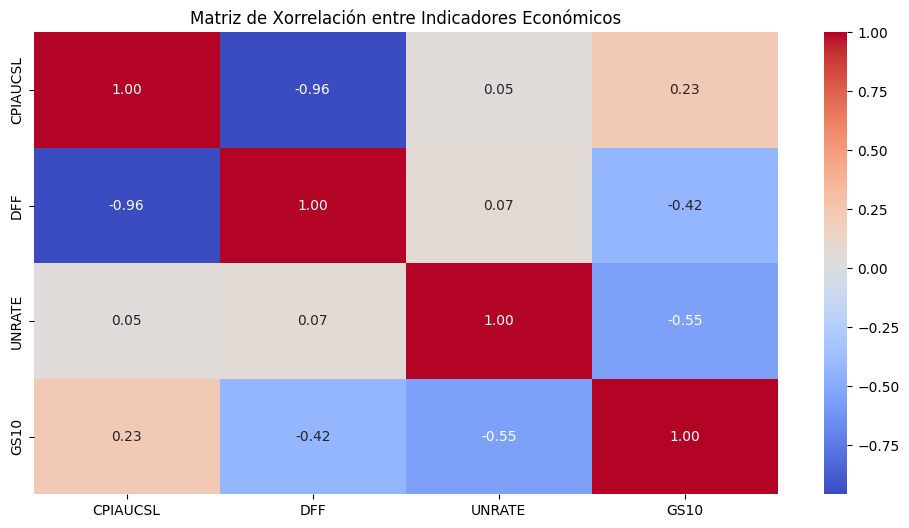

In [11]:
#matriz de correlación

plt.figure(figsize=(12,6))
sns.heatmap(df_indicadores.corr(), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Xorrelación entre Indicadores Económicos")
plt.show()

## **Nota: He tenido problemas para plotear la correlación entre los indicadores y el desempeño de JEPI. Estoy dejando en el codigo las validaciones que incluí en las siguientes dos celdas pensando enlas futuras entregas del proyecto.**

In [21]:




import pandas as pd

# Cargar JEPI
df_jepi = pd.read_csv("fondo_historico.csv")

# Validar columnas
print("Columns in df_jepi:", df_jepi.columns.tolist())

# Asegurar que 'Date'existe y está en formato datetime
if "Date" not in df_jepi.columns:
    print("Error: 'Date' column not found in fondo_historico.csv")
    exit()
df_jepi["Date"] = pd.to_datetime(df_jepi["Date"], errors="coerce")

# Setear 'Date' como index
df_jepi.set_index("Date", inplace=True)

# Verificar el index ANTES de hacer resampling
print("Index type after set_index:", type(df_jepi.index))
print("Index values sample:", df_jepi.index[:5])  # Peek at the first few index values

# Resampling
try:
    df_jepi = df_jepi[["Close"]].resample('M').last()
    print("Resampling successful!")
except TypeError as e:
    print("Resampling failed with error:", e)

# Validar resultado
print("df_jepi head:\n", df_jepi.head())

Columns in df_jepi: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains']
Index type after set_index: <class 'pandas.core.indexes.base.Index'>
Index values sample: Index([2024-03-08 00:00:00-05:00, 2024-03-11 00:00:00-04:00,
       2024-03-12 00:00:00-04:00, 2024-03-13 00:00:00-04:00,
       2024-03-14 00:00:00-04:00],
      dtype='object', name='Date')
Resampling failed with error: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
df_jepi head:
                                 Open       High        Low      Close  \
Date                                                                    
2024-03-08 00:00:00-05:00  53.112027  53.112027  52.935483  53.056274   
2024-03-11 00:00:00-04:00  52.991237  53.074864  52.805404  53.046989   
2024-03-12 00:00:00-04:00  53.093440  53.288567  53.046982  53.232819   
2024-03-13 00:00:00-04:00  53.260697  53.381492  53.204945  53.307156   
2024-03-14 00:00:00-04:00

<ipython-input-21-1e92a7634820>:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_jepi["Date"] = pd.to_datetime(df_jepi["Date"], errors="coerce")
<ipython-input-21-1e92a7634820>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_jepi = df_jepi[["Close"]].resample('M').last()


In [22]:
#validación adicional con ayuda de IA: El código en esta celda es generado por Inteligencia Artificial. NO ES MÍO.

import pandas as pd

# Load JEPI price data
df_jepi = pd.read_csv("fondo_historico.csv")

# Check columns
print("Columns in df_jepi:", df_jepi.columns.tolist())

# Ensure 'Date' column exists and is in datetime format
if "Date" not in df_jepi.columns:
    print("Error: 'Date' column not found in fondo_historico.csv")
    exit()

# Convert 'Date' to datetime, standardizing time zones with utc=True
df_jepi["Date"] = pd.to_datetime(df_jepi["Date"], errors="coerce", utc=True)

# Set 'Date' as index
df_jepi.set_index("Date", inplace=True)

# Verify the index type
print("Index type after set_index:", type(df_jepi.index))
print("Index values sample:", df_jepi.index[:5])

# Resample to monthly frequency
try:
    df_jepi = df_jepi[["Close"]].resample('ME').last()  # 'ME' replaces deprecated 'M'
    print("Resampling successful!")
except TypeError as e:
    print("Resampling failed with error:", e)

# Check the result
print("df_jepi head:\n", df_jepi.head())

Columns in df_jepi: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains']
Index type after set_index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index values sample: DatetimeIndex(['2024-03-08 05:00:00+00:00', '2024-03-11 04:00:00+00:00',
               '2024-03-12 04:00:00+00:00', '2024-03-13 04:00:00+00:00',
               '2024-03-14 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', freq=None)
Resampling successful!
df_jepi head:
                                Close
Date                                
2024-03-31 00:00:00+00:00  53.762451
2024-04-30 00:00:00+00:00  52.280869
2024-05-31 00:00:00+00:00  53.433605
2024-06-30 00:00:00+00:00  53.632305
2024-07-31 00:00:00+00:00  54.707806


## **Fin de las validaciones. Con las correcciones hechas puedo mezclar los datasets y hacer la correlación**

Correlation between JEPI and Economic Indicators:

CPIAUCSL    0.810848
DFF        -0.679541
UNRATE      0.482281
GS10       -0.225388
Name: Close, dtype: float64


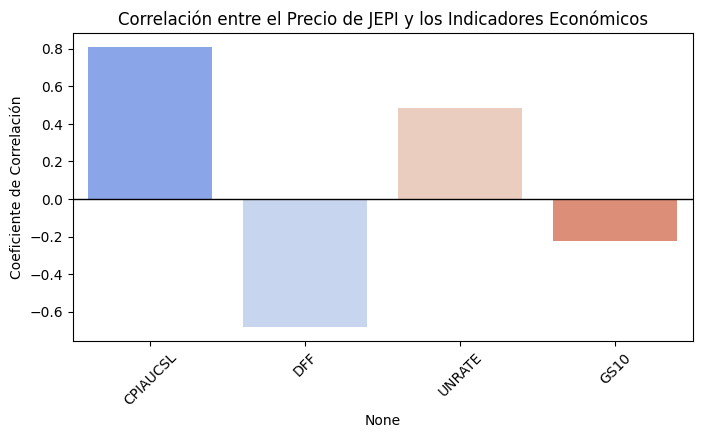

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cargar data de JEPI
df_jepi = pd.read_csv("fondo_historico.csv")
df_jepi["Date"] = pd.to_datetime(df_jepi["Date"], errors="coerce", utc=True)
df_jepi.set_index("Date", inplace=True)
df_jepi = df_jepi[["Close"]].resample('ME').last()

# cargar los indicadores macro
df_indicadores = pd.read_csv("indicadores_economicos.csv")
if 'Unnamed: 0' not in df_indicadores.columns:
    print("Error: No date column found in indicadores_economicos.csv")
    print("Available columns:", df_indicadores.columns)
    exit()
df_indicadores["Unnamed: 0"] = pd.to_datetime(df_indicadores["Unnamed: 0"], errors="coerce", utc=True)
df_indicadores.set_index("Unnamed: 0", inplace=True)
df_indicadores = df_indicadores.resample('ME').last()

# Hacer merge de los datasets
df_merged = df_jepi.join(df_indicadores, how="inner")

# Ccalcular la correlación
correlation_with_jepi = df_merged.corr()["Close"].drop("Close")

# Filtrar datos inválidos o NaN
correlation_with_jepi = correlation_with_jepi.dropna().loc[df_indicadores.columns]

# Mostrar valores de la correlación
print("Correlation between JEPI and Economic Indicators:\n")
print(correlation_with_jepi)

# Plot de resultados
plt.figure(figsize=(8,4))
sns.barplot(x=correlation_with_jepi.index, y=correlation_with_jepi.values, hue=correlation_with_jepi.index, palette="coolwarm", legend=False)
plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=45)
plt.title("Correlación entre el Precio de JEPI y los Indicadores Económicos")
plt.ylabel("Coeficiente de Correlación")
plt.show()